In [1]:
# Reading the first few lines of the uploaded file to understand its structure
file_path = '/home/mkato/hdd_data/data/1-withAADR/1-1-pca/jomon_aadr_1000GP.evec.txt.evec'
with open(file_path, 'r') as f:
    lines = [f.readline().strip() for _ in range(10)]

lines

['#eigvals:   280.784   111.899    30.070    21.716',
 'DO:DO    -0.0091     -0.0154     -0.0048     -0.0031          Control',
 'FM020:FM020    -0.0052     -0.0126     -0.0031     -0.0010          Control',
 'Jomon:Jomon    -0.0104     -0.0173     -0.0049     -0.0030          Control',
 'T5:T5    -0.0093     -0.0151     -0.0042     -0.0031          Control',
 'Ne30_genotyping_noUDG    -0.0047     -0.0036     -0.0058      0.0009  China_AmurRiver_EarlyN',
 'Ne61_genotyping_noUDG    -0.0048     -0.0036     -0.0054      0.0005  China_AmurRiver_BA',
 'Ne35_genotyping_noUDG    -0.0048     -0.0033     -0.0067      0.0013  China_AmurRiver_EarlyN',
 'I17622    -0.0000      0.0000      0.0000     -0.0000  Albania_BA_IA_lc',
 'I13833    -0.0063      0.0116     -0.0067     -0.0032  Albania_EarlyModern_oCaucasus']

In [2]:
import pandas as pd

# Reading the entire file into a DataFrame
# Skipping the first row which contains eigenvalues
df = pd.read_csv(file_path, delim_whitespace=True, skiprows=1, header=None)

# Assigning column names based on the file structure
df.columns = ['Sample', 'PC1', 'PC2', 'PC3', 'PC4', 'Population']

# Showing the first few rows of the DataFrame to confirm its structure
df.head()


,Sample,PC1,PC2,PC3,PC4,Population
0,DO:DO,-0.0091,-0.0154,-0.0048,-0.0031,Control
1,FM020:FM020,-0.0052,-0.0126,-0.0031,-0.0010,Control
2,Jomon:Jomon,-0.0104,-0.0173,-0.0049,-0.0030,Control
3,T5:T5,-0.0093,-0.0151,-0.0042,-0.0031,Control
4,Ne30_genotyping_noUDG,-0.0047,-0.0036,-0.0058,0.0009,China_AmurRiver_EarlyN


In [3]:
# List of 1000 Genomes populations
thousand_genomes_populations = [
    "CHB", "JPT", "CHS", "CDX", "KHV", "CHD", 
    "CEU", "TSI", "GBR", "FIN", "IBS", 
    "YRI", "LWK", "GWD", "MSL", "ESN", 
    "ASW", "ACB", "MXL", "PUR", "CLM", "PEL", 
    "GIH", "PJL", "BEB", "STU", "ITU"
]

# Filter the DataFrame based on the conditions
filtered_df = df[df['Population'].str.contains('Japan') |
                 (df['Population'] == 'Control') |
                 df['Population'].str.split('.').str[0].isin(thousand_genomes_populations) & 
                 df['Population'].str.contains('.SG|.DG', regex=True)]

# Showing the first few rows of the filtered DataFrame
filtered_df.head()


,Sample,PC1,PC2,PC3,PC4,Population
0,DO:DO,-0.0091,-0.0154,-0.0048,-0.0031,Control
1,FM020:FM020,-0.0052,-0.0126,-0.0031,-0.0010,Control
2,Jomon:Jomon,-0.0104,-0.0173,-0.0049,-0.0030,Control
3,T5:T5,-0.0093,-0.0151,-0.0042,-0.0031,Control
70,HG01879.SG,0.0205,-0.0003,0.0014,-0.0017,ACB.SG


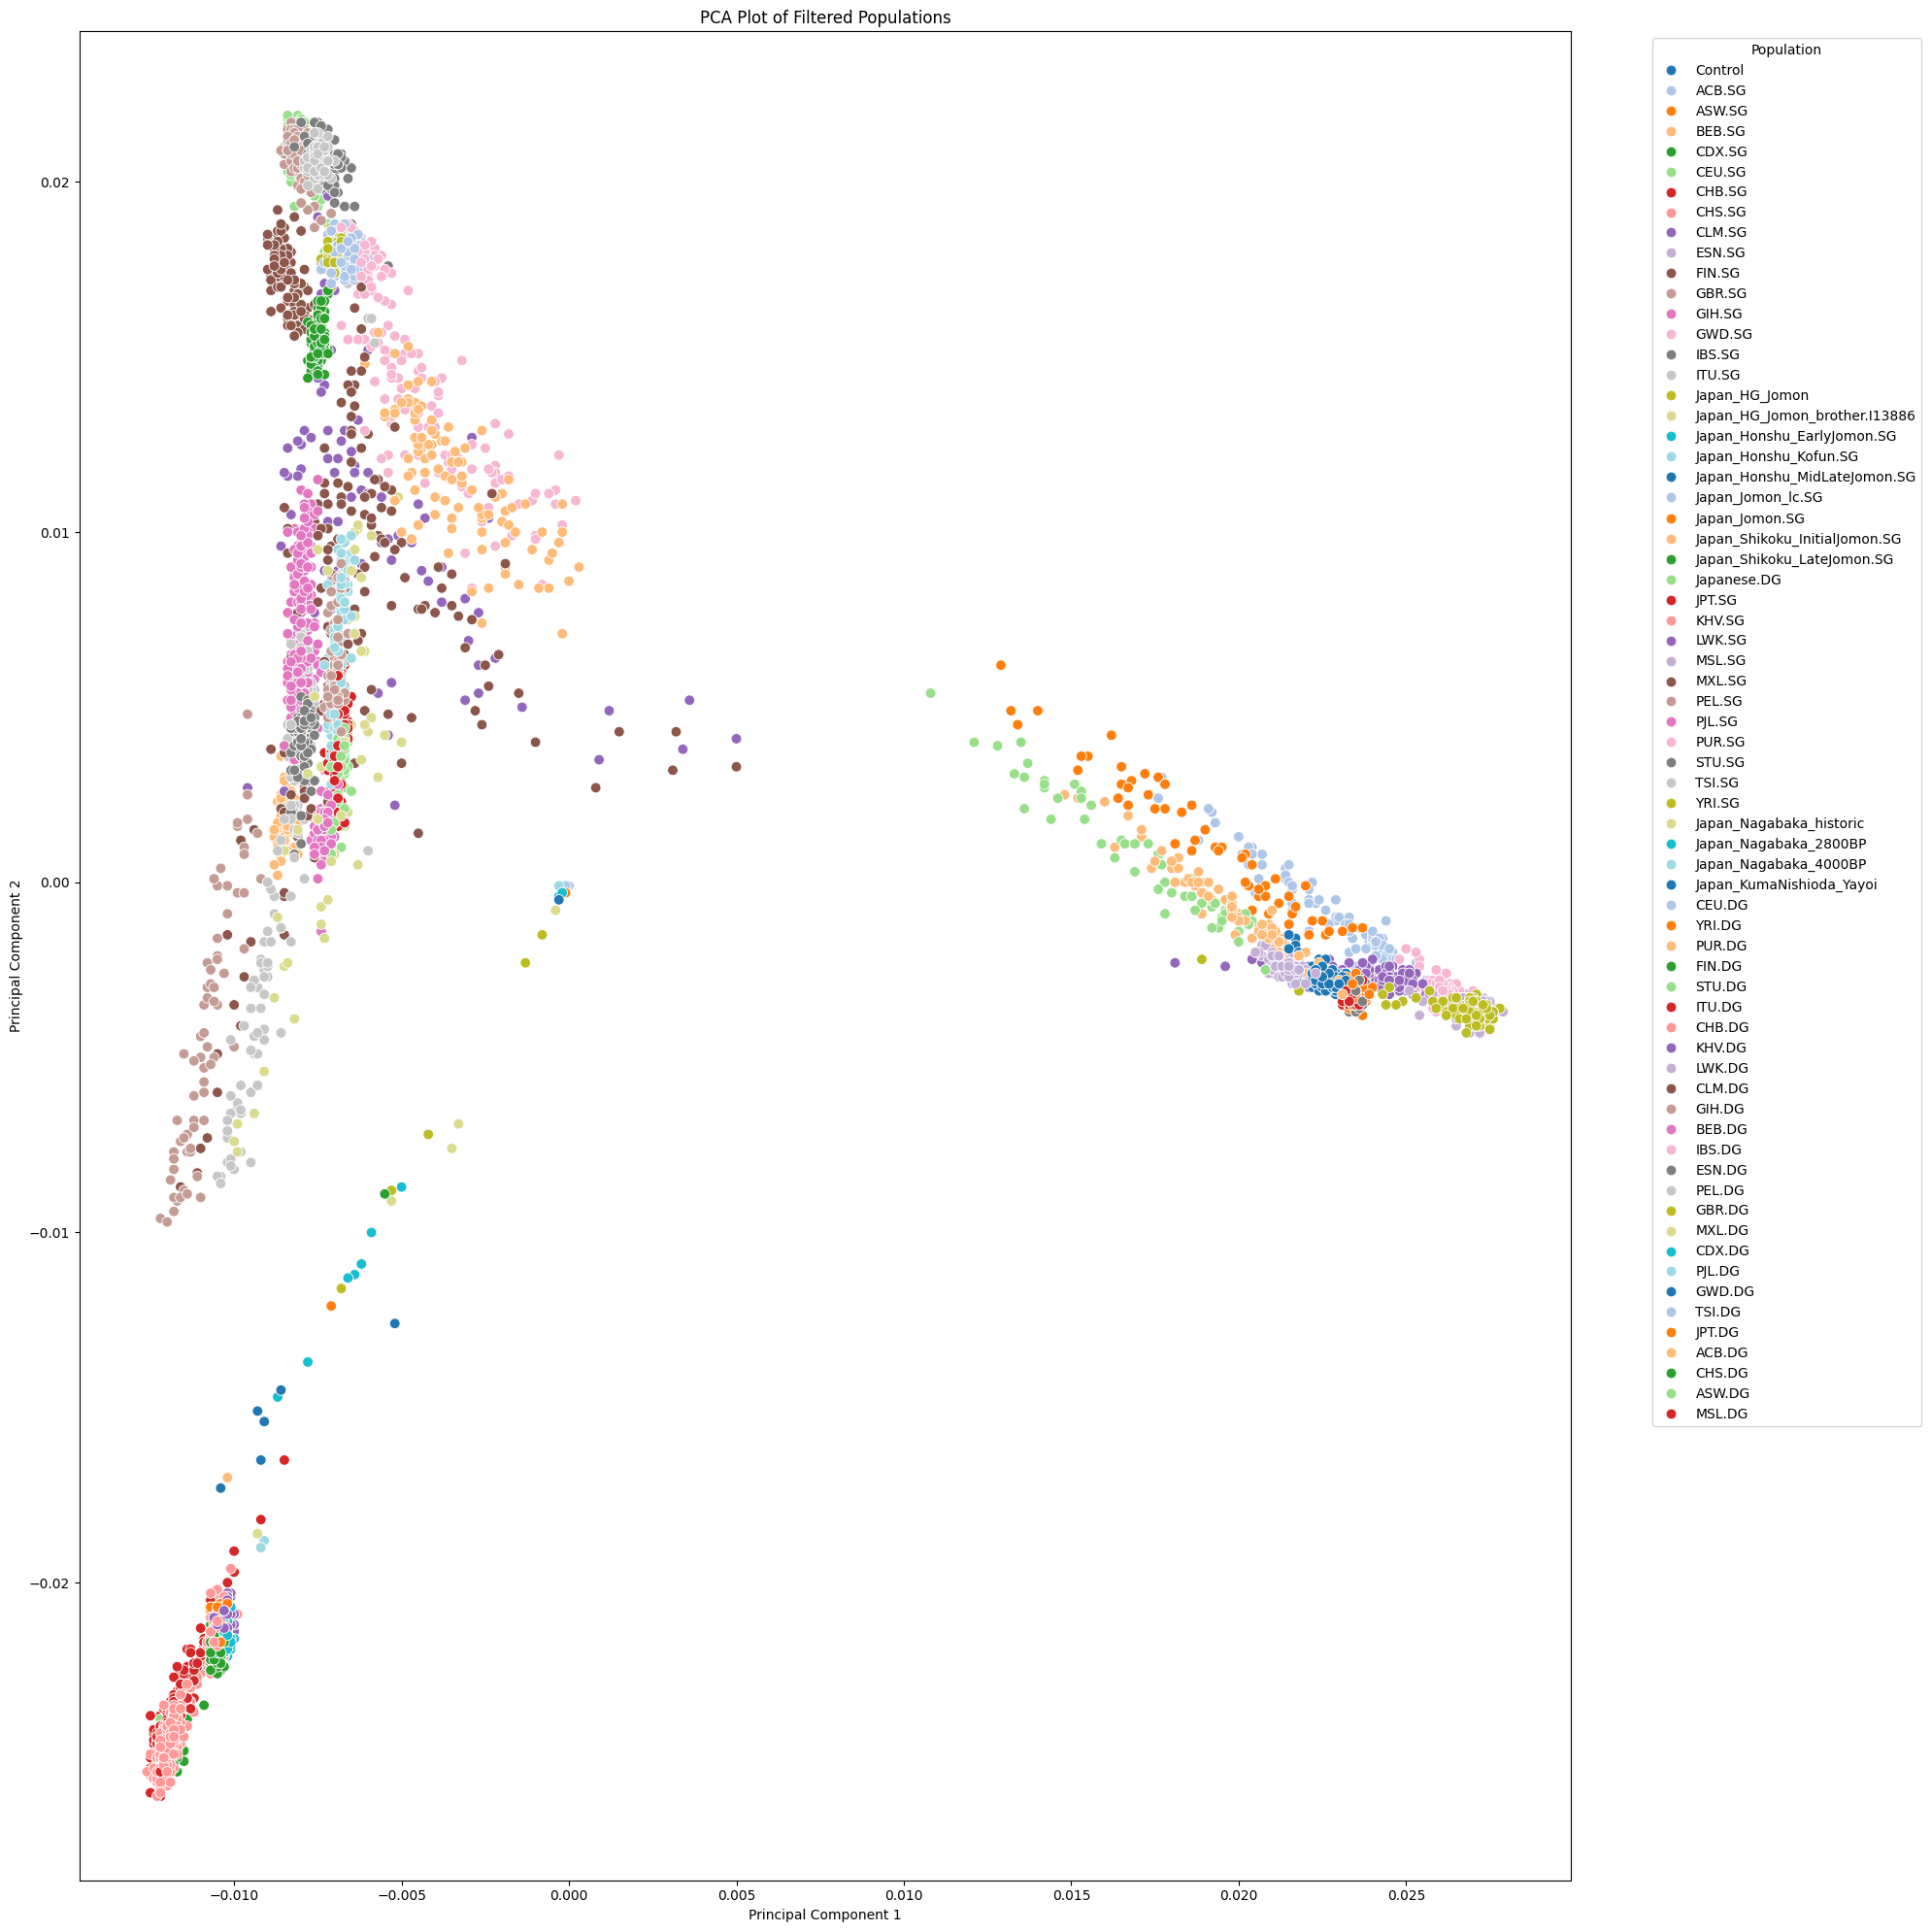

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Create a scatter plot for PC1 vs PC2
sns.scatterplot(data=filtered_df, x='PC1', y='PC2', hue='Population', palette='tab20', s=60, edgecolor='w')

# Customize the plot
plt.title('PCA Plot of Filtered Populations')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Population', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_2042661/1169829157.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Categorized_Population'] = filtered_df['Population'].apply(categorize_population)


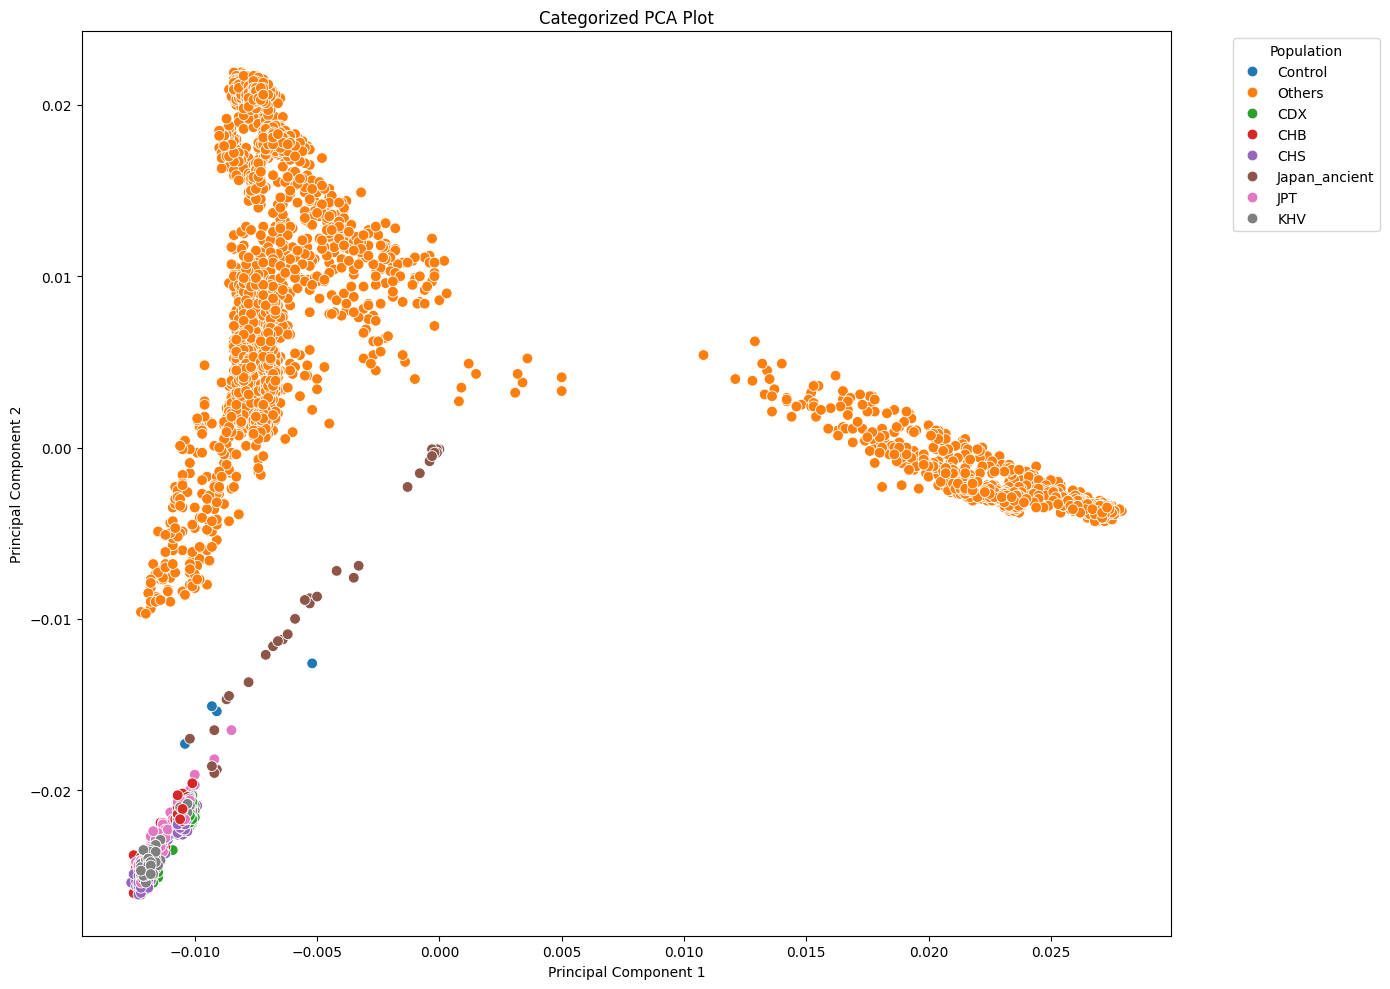

In [10]:
# Function to categorize populations for the plot
def categorize_population(pop):
    east_asian_populations = ["CDX", "CHB", "CHS", "JPT", "KHV"]
    if "Japan" in pop:
        return "Japan_ancient"
    elif pop == "Control":
        return "Control"
    elif pop.split('.')[0] in east_asian_populations:
        return pop.split('.')[0]
    else:
        return "Others"

# Apply the categorization function to the Population column
filtered_df['Categorized_Population'] = filtered_df['Population'].apply(categorize_population)

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Create a scatter plot for PC1 vs PC2 with the categorized populations
sns.scatterplot(data=filtered_df, x='PC1', y='PC2', hue='Categorized_Population', palette='tab10', s=60, edgecolor='w')

# Customize the plot
plt.title('Categorized PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Population', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_2042661/4168865591.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Custom_Label'] = filtered_df.apply(customize_label, axis=1)


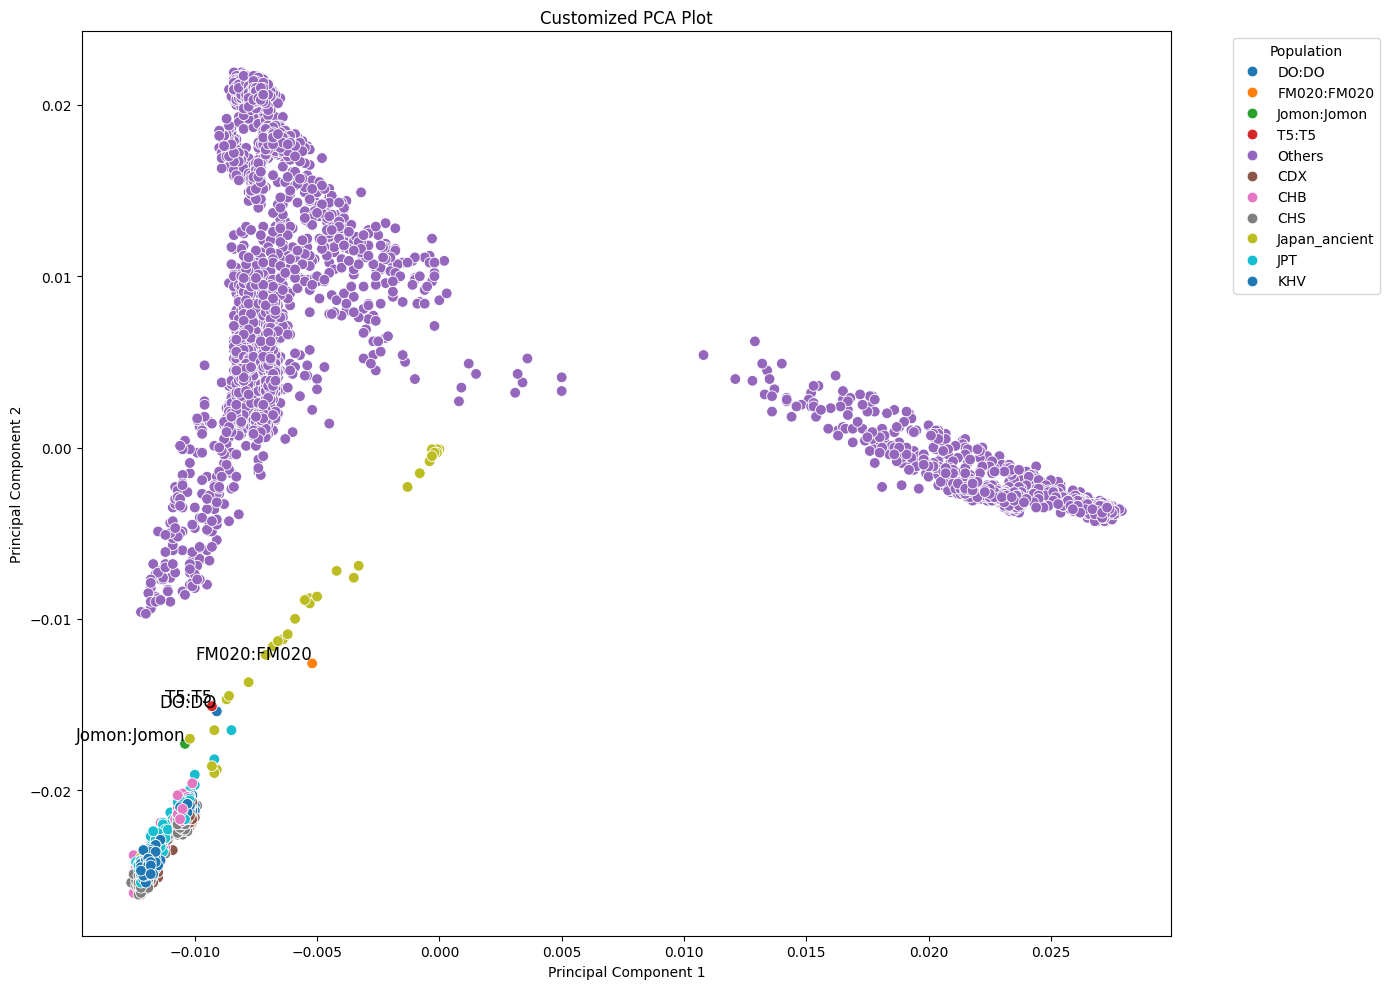

In [11]:
# Function to customize labels for the plot
def customize_label(row):
    if row['Population'] == 'Control':
        return row['Sample']
    else:
        return row['Categorized_Population']

# Apply the customization function to create a new label column
filtered_df['Custom_Label'] = filtered_df.apply(customize_label, axis=1)

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Create a scatter plot for PC1 vs PC2 with customized labels
plot = sns.scatterplot(data=filtered_df, x='PC1', y='PC2', hue='Custom_Label', palette='tab10', s=60, edgecolor='w')

# Annotate Control samples with their Sample names
for index, row in filtered_df.iterrows():
    if row['Population'] == 'Control':
        plot.text(row['PC1'], row['PC2'], row['Sample'], horizontalalignment='right', verticalalignment='bottom', fontsize=12, color='black')

# Customize the plot
plt.title('Customized PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Population', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()
